In [1]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd
import numpy as np

In [2]:
from pandas import DataFrame


housing = fetch_california_housing(as_frame=True)
X = housing.data
y = housing.target

# print(housing.DESCR)
print(housing.frame.head())
print(housing.target.head())


# if 'as_frame=False'
# df = pd.DataFrame(housing.data, columns=housing.feature_names)
# df["target"] = housing.target
# df.head()

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  
0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
reg = DecisionTreeRegressor(random_state=42)
reg.fit(X_train, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [6]:
preds = reg.predict(X_test)
mae = mean_absolute_error(y_test, preds)
rmse = mean_squared_error(y_test, preds)
r2 = r2_score(y_test, preds)

In [7]:
print(f"MAE : {mae:.3f}")
print(f"RMSE : {rmse:.3f}")
print(f"R2 : {r2:.3f}")

MAE : 0.456
RMSE : 0.500
R2 : 0.619


In [18]:
from sklearn.model_selection import KFold, cross_val_score

reg = DecisionTreeRegressor(max_depth=5, random_state=42)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

scores = cross_val_score(
    reg,
    X_train,
    y_train,
    scoring="neg_root_mean_squared_error",
    cv=kf
)

print("Scores RMSE (négatifs) :", scores)
print("RMSE moyen :", -scores.mean())
print("Écart-type :", scores.std())

Scores RMSE (négatifs) : [-0.73676068 -0.72366202 -0.72052253 -0.72771551 -0.70514645]
RMSE moyen : 0.7227614362911459
Écart-type : 0.010359854323167076


In [15]:
# Fit on the full training data
reg.fit(X_train, y_train)

# Now you can use it on the test set
preds = reg.predict(X_test)


In [16]:
mae = mean_absolute_error(y_test, preds)
rmse = mean_squared_error(y_test, preds)
r2 = r2_score(y_test, preds)

print(f"MAE : {mae:.3f}")
print(f"RMSE : {rmse:.3f}")
print(f"R2 : {r2:.3f}")

MAE : 0.522
RMSE : 0.525
R2 : 0.600


In [20]:
def evaluate_model(model, X, y):
    """
    Évalue un modèle de régression via validation croisée (5 folds)
    et retourne le RMSE moyen.
    """
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    
    # scoring = neg_root_mean_squared_error calcule -RMSE
    scores = cross_val_score(
        model,
        X,
        y,
        cv=kf,
        scoring="neg_root_mean_squared_error"
    )
    
    # On renvoie le RMSE moyen (valeur positive)
    mean_rmse = -np.mean(scores)
    return mean_rmse

In [24]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# --- Liste des modèles ---
models = {
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

# --- Évaluation et stockage des résultats ---
results = []
for name, model in models.items():
    rmse = evaluate_model(model, X, y)
    results.append({"Modèle": name, "RMSE moyen (CV=5)": rmse})

# --- DataFrame comparatif ---
df_results = pd.DataFrame(results).sort_values(by="RMSE moyen (CV=5)")
print(df_results)

              Modèle  RMSE moyen (CV=5)
1      Random Forest           0.503203
2  Gradient Boosting           0.531440
0      Decision Tree           0.717004


In [27]:
# Fit on the full training data
reg = models["Random Forest"]
reg.fit(X_train, y_train)

# Now you can use it on the test set
preds = reg.predict(X_test)

mae = mean_absolute_error(y_test, preds)
rmse = mean_squared_error(y_test, preds)
r2 = r2_score(y_test, preds)

print(f"MAE : {mae:.3f}")
print(f"RMSE : {rmse:.3f}")
print(f"R2 : {r2:.3f}")


MAE : 0.328
RMSE : 0.256
R2 : 0.805


In [28]:
results = []
for depth in range(2, 11):
    reg = DecisionTreeRegressor(max_depth=depth, random_state=42)
    rmse_cv = -cross_val_score(
        reg,
        X_train,
        y_train,
        scoring="neg_root_mean_squared_error",
        cv=5
    ).mean()
    results.append({"max_depth": depth, "rmse_cv": rmse_cv})

results_df = pd.DataFrame(results)
print(results_df)

   max_depth   rmse_cv
0          2  0.859221
1          3  0.795664
2          4  0.755470
3          5  0.712606
4          6  0.676735
5          7  0.652650
6          8  0.636682
7          9  0.632814
8         10  0.642836


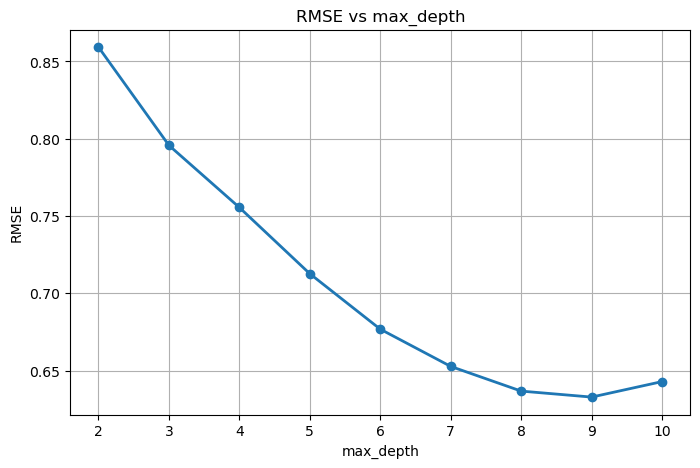

In [29]:
import matplotlib.pyplot as plt

# Version simplifiée pour tracer la courbe de results_df
plt.figure(figsize=(8, 5))
plt.plot(results_df['max_depth'], results_df['rmse_cv'], 'o-', linewidth=2, markersize=6)
plt.xlabel('max_depth')
plt.ylabel('RMSE')
plt.title('RMSE vs max_depth')
plt.grid(True)
plt.show()
